In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model_explore.pytorch import segmentation, io
import matplotlib.pyplot as plt
import torch

copick_config_path = "/mnt/simulations/ml_challenge/ml_config.json"

in_model_weights = '/mnt/simulations/ml_challenge/resunet_results/best_metric_model.pth'
my_channels = [32, 64, 128, 128]
my_strides = [2, 2, 1]
my_res_units = 2

/mnt/jonathan/pyUNET/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
predict = segmentation.Predictor(copick_config_path, 
                                 in_model_weights,
                                 my_channels = [32, 64, 128, 128],
                                 my_strides = [2,2,1], 
                                 my_num_res_units = 2)

Running Inference On:  cuda


#### Option 1: Show Only Tomogram and Predicted Masks

In [ ]:
runIDs = ['TS_4', 'TS_17', 'TS_24']

# Manual Load the Tomograms
test_files = io.load_predict_data(predict.root, runIDs, 10, 'wbp')

# Extract the Predictions
predictions = predict._predict_on_gpu(runIDs, 10, 'wbp')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]/mnt/jonathan/cziimaginginstitute-model-exploration/src/model_explore/pytorch/segmentation.py:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
100%|██████████| 1/1 [00:06<00:00,  6.29s/it]


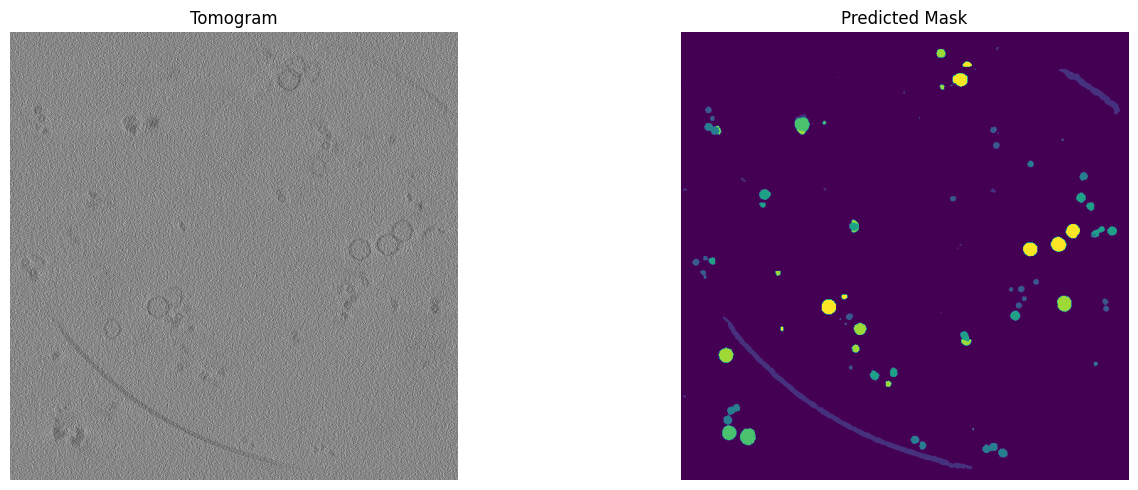

In [ ]:
tomo_index = 0

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Tomogram')
plt.imshow(test_files[tomo_index]['image'][60], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Predicted Mask')
plt.imshow(predictions[tomo_index][60],cmap='viridis')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Option 2: Show Tomogram, Ground Truth Labels, and Predicted Masks

In [ ]:
runIDs = ['TS_4', 'TS_17', 'TS_24']

# Manual Load the Tomograms
test_files = io.load_training_data(predict.root, runIDs, 10, 'wbp', 'segmentation')

# Extract the Predictions
predictions = predict._predict_on_gpu(runIDs, 10, 'wbp')

  0%|          | 0/1 [00:00<?, ?it/s]/mnt/jonathan/cziimaginginstitute-model-exploration/src/model_explore/pytorch/segmentation.py:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
100%|██████████| 1/1 [00:05<00:00,  5.20s/it]


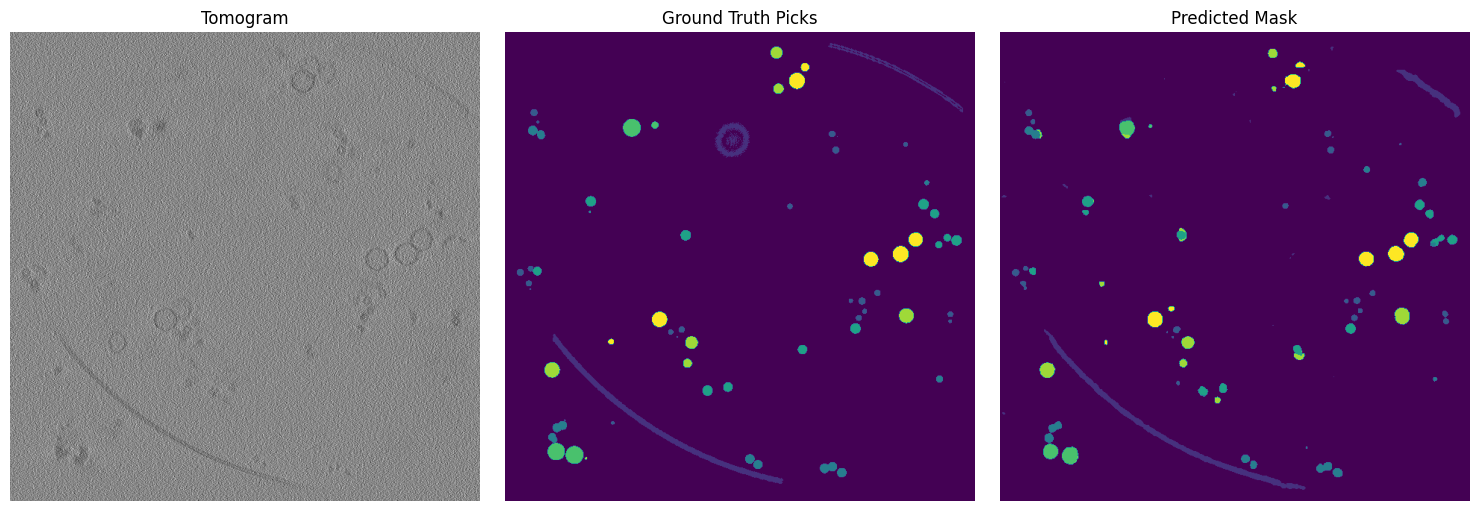

In [9]:
tomo_index = 0

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Tomogram')
plt.imshow(test_files[tomo_index]['image'][60], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ground Truth Picks')
plt.imshow(test_files[tomo_index]['label'][60], cmap='viridis')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(predictions[tomo_index][60],cmap='viridis')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
import copick
root = copick.from_file(copick_config_path)

run = root.get_run('TS_15')

tomo = run.get_voxel_spacing(10).get_tomogram('wbp').numpy()
seg_gt = run.get_segmentations(name = 'segmentation')[0].numpy()
seg = run.get_segmentations(name='prediction')[0].numpy()

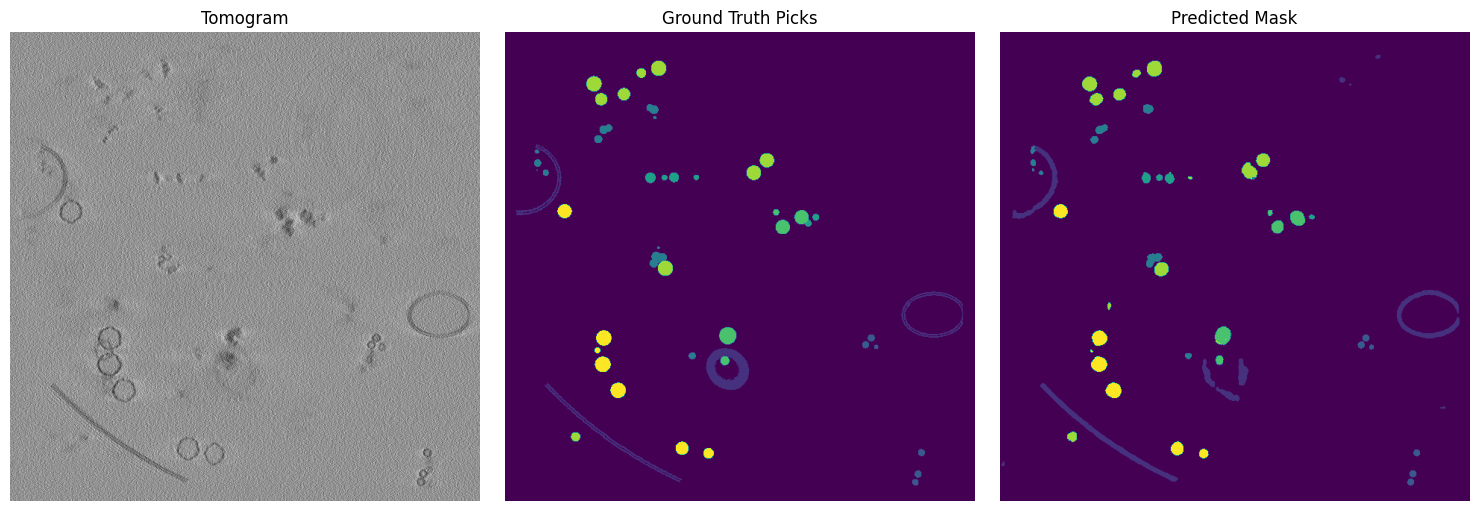

In [7]:
tomo_index = 0

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Tomogram')
plt.imshow(tomo[60], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ground Truth Picks')
plt.imshow(seg_gt[60], cmap='viridis')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(seg[60],cmap='viridis')
plt.axis('off')

plt.tight_layout()
plt.show()